### **Vivek Dadhich**

### **20MAI0077**

### Repository-link -> https://github.com/vivek20dadhich/CSE6037-Deep-Learning-and-its-Applications-Lab-Assignments

 Task 1 -> Write a program to implement the AlexNet model (Note : You can use any publically
available dataset for testing). While implementing you have to show following things:
- Display sample input and output images (at least 10 images).
- Display the total images in the database, size of the image, no of classes in the database.
- Display the first convolution function kernel filter coefficient values
- Display the training accuracy / training error
- Display the testing accuracy
<br /><br />

In [2]:
#importing required packages

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization


In [3]:
np.random.seed(0) # If we set the np.random.seed(a_fixed_number) every time when we call the numpy's other random function, the result will be the same

In [4]:
#Instantiation
AlexNet = Sequential()



**Architecture of AlexNet**
> The AlexNet proposed by Alex Krizhevsky in his work has eight layers including five convolutional layers followed by three fully connected layers. Some of the convolutional layers of the model are followed by max-pooling layers. As an activation function, the ReLU function is used by the network which shows improved performance over sigmoid and tanh functions.





**Why ReLU?**

> The ReLU activation function makes model training easier when using different parameter initialization methods. This is because, when the output of the sigmoid activation function is very close to 0 or 1, the gradient of these regions is almost 0, so that backpropagation cannot continue to update some of the model parameters. In contrast, the gradient of the ReLU activation function in the positive interval is always 1. Therefore, if the model parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 in the positive interval, so that the model cannot be effectively trained.






In [7]:
#1st Convolution Layer
AlexNet.add(Conv2D(filters=96,input_shape=(32,32,3),kernel_size=(11,11),strides=(4,4),padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

In [8]:
#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


In [9]:
#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [10]:
#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

In [11]:
#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


In [12]:
#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

In [13]:
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

In [14]:
#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [15]:
#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [16]:
#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [57]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [17]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


#1) Display sample input and output images (at least 10 images).


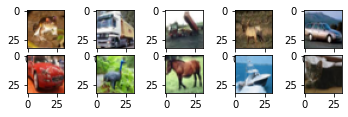

In [38]:
from matplotlib import pyplot as plt
# plot first few input images from training datasets
for i in range(10):
	# define subplot
	plt.subplot(5,5,i+1)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

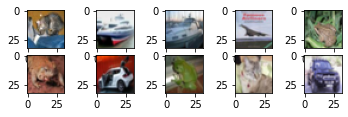

In [39]:
# plot first few input images for testing dataset
for i in range(10):
	# define subplot
	plt.subplot(5,5,i+1)
	plt.imshow(x_test[i])
# show the figure
plt.show()

#2) Display the total images in the database, size of the image, no of classes in the database.
 

In [40]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [41]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(35000, 32, 32, 3), y=(35000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(15000, 32, 32, 3), y=(15000, 1)


In [42]:
print("Total images in dataset: ",x_train.shape[0]+x_test.shape[0]+x_val.shape[0])

Total images in dataset:  60000


In [43]:
print("Size of the image: ",x_train[0].shape)
#here 3 stands for rgb channel

Size of the image:  (32, 32, 3)


In [44]:
classes = np.unique(y_train)
print("classes in output class is: ",classes)
print("No. of classes in output class: ",len(classes))

classes in output class is:  [0 1 2 3 4 5 6 7 8 9]
No. of classes in output class:  10


In [45]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))

print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#3) Display the first convolution function kernel filter coefficient values
 

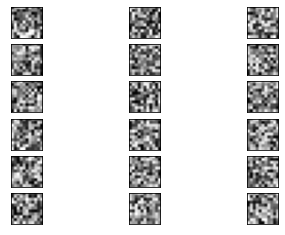

In [48]:
filters, biases = AlexNet.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

# 4) Display the training accuracy / training error

In [49]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [50]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [54]:
#Defining the parameters
batch_size= 100
epochs=20
learn_rate=.001

In [58]:
#Training the model
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, verbose=1,callbacks=[lrr])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
350/350 [==============================] - 59s 71ms/step - loss: 1.8400 - accuracy: 0.3414 - val_loss: 1.8475 - val_accuracy: 0.3528
Epoch 2/20
350/350 [==============================] - 18s 52ms/step - loss: 1.4621 - accuracy: 0.4919
Epoch 3/20
350/350 [==============================] - 18s 52ms/step - loss: 1.3135 - accuracy: 0.5454
Epoch 4/20
350/350 [==============================] - 19s 54ms/step - loss: 1.2385 - accuracy: 0.5811
Epoch 5/20
350/350 [==============================] - 19s 53ms/step - loss: 1.1720 - accuracy: 0.6027
Epoch 6/20
350/350 [==============================] - 18s 53ms/step - loss: 1.0736 - accuracy: 0.6364
Epoch 7/20
350/350 [==============================] - 18s 53ms/step - loss: 1.0375 - accuracy: 0.6482
Epoch 8/20
350/350 [==============================] - 18s 53ms/step - loss: 0.9734 - accuracy: 0.6675
Epoch 9/20
350/350 [==============================] - 19s 53ms/step - loss: 0.9243 - accuracy: 0.6863
Epoch 10/20
350/350 [===================

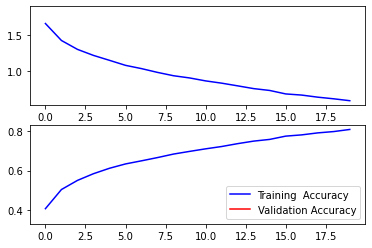

In [59]:
#After successful training, we will visualize its performance.

import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [60]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

#5) Display the testing accuracy


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


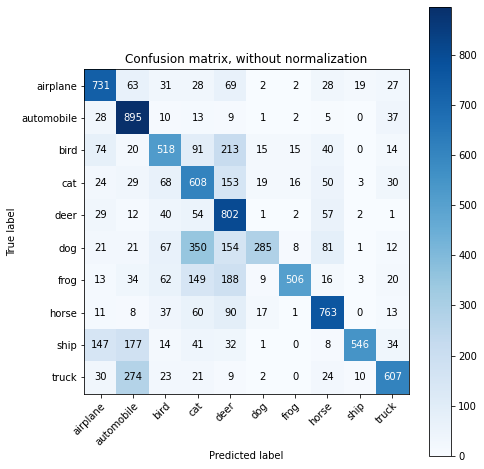

In [61]:
#predicting the class labels for the test images using the trained AlexNet model.Making prediction
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


Normalized confusion matrix


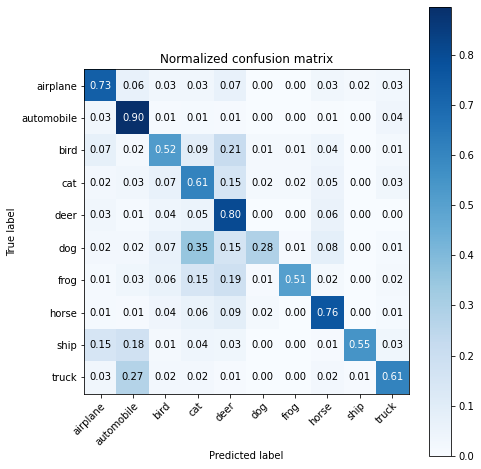

In [62]:
# Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')



In [63]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Testing Accuracy Score = ', acc_score)

Testing Accuracy Score =  0.6261
